In [1]:
import numpy as np
import matplotlib.pyplot as plt
import custom_linalg as linalg
import regression as reg
import search_methods as sm
np.random.seed(10000)

In [2]:
# data generation
F = lambda x: 10*np.exp(-2*x**2)
X = np.random.rand(100)
X = np.sort(X)
noise = 0.25*np.random.randn(len(X))
Y = np.array([F(i) for i in X]) + noise
Yerr = np.random.rand(100) 
'''
d = np.loadtxt("data2", dtype=[('x','f8'),('y','f8'),('yerr','f8')])
x = d['x'].astype(float)
y = d['y'].astype(float)
yerr = d['yerr'].astype(float)'''

'\nd = np.loadtxt("data2", dtype=[(\'x\',\'f8\'),(\'y\',\'f8\'),(\'yerr\',\'f8\')])\nx = d[\'x\'].astype(float)\ny = d[\'y\'].astype(float)\nyerr = d[\'yerr\'].astype(float)'

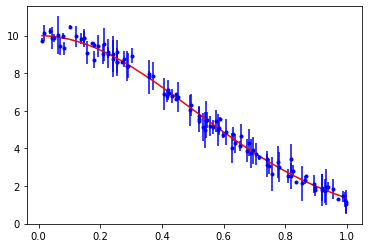

In [3]:
plt.errorbar(X,Y,Yerr,fmt=".b")
plt.plot(X,[F(i) for i in X],'r')

# Curve Fitting Method

In [12]:
basis_f = {
    0: lambda x: 1,
    1: lambda x: x**2,
}

In [13]:
idx = np.where(Y>0)
A = np.zeros(len(basis_f.keys()))
x = X[idx] # x=X
y = np.log(Y[idx]) # y=log(Y)
yerr = Yerr[idx]/Y[idx] # dy = dY/Y

In [14]:
N = len(x)
f,b,cov = reg.get_best_fit_func(x,y,yerr,basis_f)
db = np.sqrt(np.diag(cov))

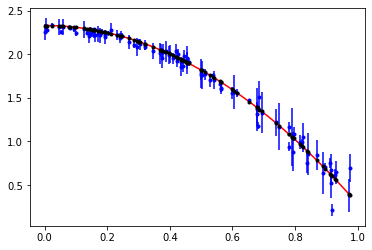

In [15]:
y_fit = np.array([f(i) for i in x])
y_fit_err = reg.get_y_fit_err(x,f,cov, basis_f)
plt.errorbar(x,y,yerr,fmt=".b")
plt.errorbar(x,y_fit,y_fit_err,fmt=".k")
plt.plot(x,y_fit,'r')

In [16]:
rchi2, p = reg.get_rchi2(f,x,y,yerr,len(basis_f.keys()))

In [47]:
b,db

(array([[ 2.3300459 ],
        [-2.04608238]]),
 array([0.00129938, 0.01362214]))

In [48]:
A = np.exp(b[0]),b[1]

In [50]:
A

(array([10.27841325]), array([-2.04608238]))

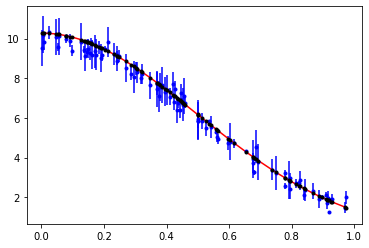

In [56]:
f_fit = lambda x: A[0]*np.exp(A[1]*x**2)
Y_fit = [f_fit(i) for i in x]
Y_fit_err = np.exp(y)*y_fit_err
plt.errorbar(X,Y,Yerr,fmt=".b")
plt.errorbar(X,Y_fit,Y_fit_err,fmt=".k")
plt.plot(X,Y_fit,'r')

# Grid Search Method

In [16]:
x = X.reshape(-1,1)
f = lambda x,a1,a2: a1*np.exp(a2*x**2)
arr = [[9.8,10.2,0.01],[-2.5,-1.8,0.01]]
a_fit,a_fit_err = sm.curvefit_grid_search(f=f,a=arr,x=x,y=Y,yerr=Yerr,metric="rchi2")

In [17]:
a_fit, a_fit_err

([10.216721497504047, -2.1774730216327214],
 [0.014207495708272464, 0.029401509664754168])

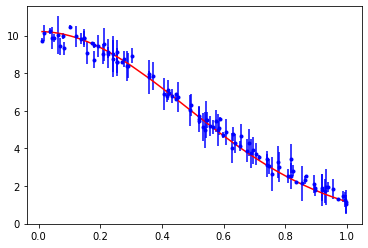

In [18]:
f_fit = lambda x: f(x,*a_fit)
Y_fit = [f_fit(i) for i in x]
plt.errorbar(X,Y,Yerr,fmt=".b")
plt.plot(X,Y_fit,'r')

# Gradient Search Method

In [4]:
idx = np.where(Yerr>0)
x = X[idx] # x=X
y = np.log(Y[idx]) # y=log(Y)
yerr = Yerr[idx]/Y[idx] # dy = dY/Y

x = X.reshape(-1,1)
f = lambda x,a1,a2: a1*np.exp(a2*x**2)
a = [9,-1.5]
a_fit,a_fit_err = sm.curvefit_grad_search(f=f,a=a,x=x,y=Y,yerr=Yerr,metric="rchi2",h=0.001)
print(a_fit,a_fit_err)

[10.26527095 -2.28093156] [0.45097127 0.94929159]
